In [9]:
import matplotlib.pyplot as plt
from matplotlib import image
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import cv2
import os
from BfTableGenerator import TDmapLoader
from tqdm import tqdm
from Utils import *
from open3d.web_visualizer import draw
from joblib import Parallel, delayed
from VisulizerTools import *
from DDBSCAN import Raster_DBSCAN
import time
plt.rcParams["font.family"] = "Times New Roman"

In [40]:
def count(TSAv):
    temp_count = 0
    apear_ind = []
    counts = []
    for i in range(len(TSAv)):
        if (TSAv[i] == True):
            temp_count += 1
        else:
            if (i > 0) & (TSAv[i - 1] == True):
                apear_ind.append(i - temp_count)
                counts.append(temp_count)
                temp_count = 0
                counts.append(0)
            else:
                counts.append(0)
        if (i == len(TSAv) - 1) & (temp_count != 0):
            apear_ind.append(i - temp_count + 1)
            counts.append(temp_count)
    counts = np.array(counts)
    counts = counts[counts > 0]
    return np.array(counts), np.array(apear_ind)

In [2]:
aggregated_map = []
Inten_maps = []
pcap_path = r'D:\LiDAR_Data\MidTown\California\2021-12-10-21-0-0.pcap'
end_frame = 18000
lidar_reader = TDmapLoader(pcap_path)
frame_gen = lidar_reader.frame_gen()
for i in tqdm(range(end_frame)):
    Frame = next(frame_gen)
    if Frame is None:
        break 
    Td_map,Int_map = Frame
    aggregated_map.append(Td_map)
    Inten_maps.append(Int_map)
aggregated_map = np.array(aggregated_map)
Inten_maps = np.array(Inten_maps)

 99%|███████████████████████████████████████████████████████████████████████████▎| 17846/18000 [12:09<00:06, 24.48it/s]


In [6]:
thred_map = gen_bckmap(aggregated_map, N = 10,d_thred = 0.08,bck_n = 3 )

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:52<00:00,  1.64s/it]


In [10]:
Td_map = aggregated_map[12365]
Foreground_map = ~(np.abs(Td_map - thred_map) <= 1.5).any(axis = 0)
pcd = get_pcd_colored(Td_map,Foreground_map)
draw(pcd,height=1000,width=1000)# Labeling_map = self.db.fit_predict(Td_map= Td_map,Foreground_map=Foreground_map)

WebVisualizer(window_uid='window_2')

0.0
1558


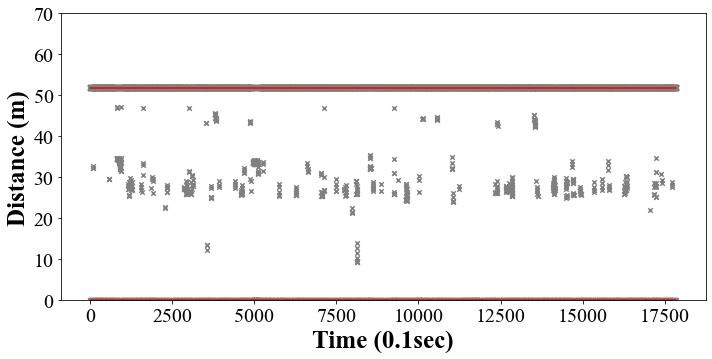

In [129]:
laser_id = 20
azimuth_channel = 1558
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(temp)),temp,s = 20, marker = 'x', label = "Laser Traveling Distance", c = 'gray')
thred = thred_map[:,laser_id,azimuth_channel]
for i in range(len(thred)):
    plt.hlines(thred[i],0,aggregated_map.shape[0],color = 'r')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel('Distance (m)',fontsize = 25, fontweight = 'bold')
plt.xlabel('Time (0.1sec)',fontsize = 25, fontweight = 'bold')
plt.tight_layout()
plt.ylim(0,70)

# plt.xlim(1400,1500)
# plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\parameterdefinition.tif', dpi = 600)
plt.show()

51.92
1557


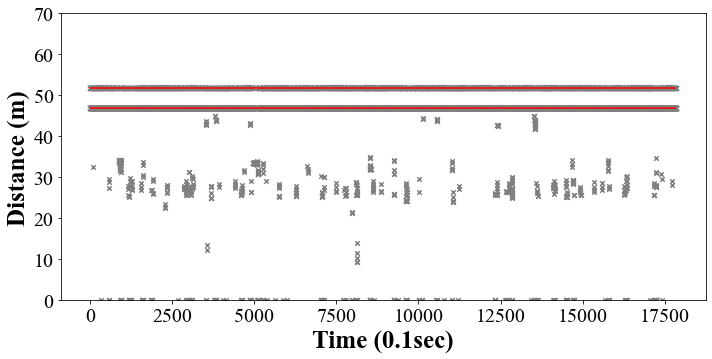

In [102]:
laser_id = 20
azimuth_channel = 1557
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(temp)),temp,s = 20, marker = 'x', label = "Laser Traveling Distance", c = 'gray')
thred = thred_map[:,laser_id,azimuth_channel]
for i in range(len(thred)):
    plt.hlines(thred[i],0,aggregated_map.shape[0],color = 'r')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel('Distance (m)',fontsize = 25, fontweight = 'bold')
plt.xlabel('Time (0.1sec)',fontsize = 25, fontweight = 'bold')
plt.tight_layout()
plt.ylim(0,70)

# plt.xlim(1400,1500)
# plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\parameterdefinition.tif', dpi = 600)
plt.show()

57.828
1248


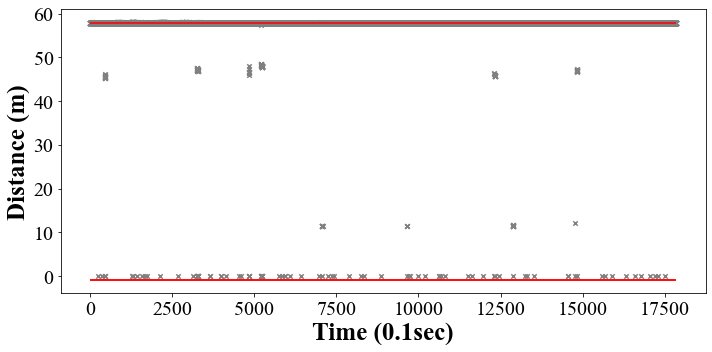

In [123]:
laser_id = 14
azimuth_channel = 1248
print(aggregated_map[-4,laser_id,azimuth_channel])
print(azimuth_channel)
temp = aggregated_map[:,laser_id,azimuth_channel].copy()
plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(temp)),temp,s = 20, marker = 'x', label = "Laser Traveling Distance", c = 'gray')
thred = thred_map[:,laser_id,azimuth_channel]
for i in range(len(thred)):
    plt.hlines(thred[i],0,aggregated_map.shape[0],color = 'r')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel('Distance (m)',fontsize = 25, fontweight = 'bold')
plt.xlabel('Time (0.1sec)',fontsize = 25, fontweight = 'bold')
plt.tight_layout()
# plt.ylim(0,70)

# plt.xlim(1400,1500)
# plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\parameterdefinition.tif', dpi = 600)
plt.show()

In [124]:
i = 14
j = 1248
temp = aggregated_map[:,i,j].copy()
foreground_points = temp.copy()
thred = thred_map[:,i,j]

for s in thred:
    d = 0.5
    foreground_points[(foreground_points < (s + d) )&(foreground_points > (s - d))] = 0
foreground = foreground_points[foreground_points != 0]

if len(foreground) > 0:
    counts,appear_ind = count(foreground_points != 0)
    volume = len(counts)
    occupancy = (foreground_points != 0).sum() / len(foreground_points)
    Moving_map[i,j] = np.median(foreground)
    Occupancy_map[i,j] = occupancy
    Volume_map[i,j] = volume * 2 # veh/h

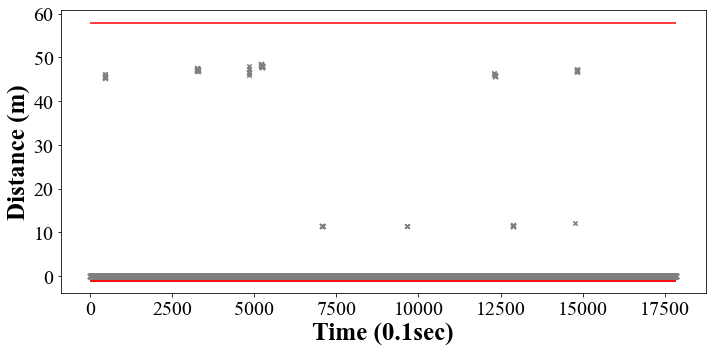

In [125]:
temp = foreground_points
plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(temp)),temp,s = 20, marker = 'x', label = "Laser Traveling Distance", c = 'gray')
thred = thred_map[:,i,j]
for i in range(len(thred)):
    plt.hlines(thred[i],0,aggregated_map.shape[0],color = 'r')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel('Distance (m)',fontsize = 25, fontweight = 'bold')
plt.xlabel('Time (0.1sec)',fontsize = 25, fontweight = 'bold')
plt.tight_layout()
# plt.ylim(0,70)

# plt.xlim(1400,1500)
# plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\parameterdefinition.tif', dpi = 600)
plt.show()

In [69]:
Moving_map = np.zeros((aggregated_map.shape[1],aggregated_map.shape[2])) #the distance for moving motions
Occupancy_map = np.zeros((aggregated_map.shape[1],aggregated_map.shape[2])) #occupancy in each direction
Volume_map = np.zeros((aggregated_map.shape[1],aggregated_map.shape[2]))

for i in tqdm(range(aggregated_map.shape[1])):
    for j in range(aggregated_map.shape[2]):
        temp = aggregated_map[:,i,j].copy()
        foreground_points = temp.copy()
        thred = thred_map[:,i,j]

        for s in thred:
            d = 0.5
            foreground_points[(foreground_points < (s + d) )&(foreground_points > (s - d))] = 0
        foreground = foreground_points[foreground_points != 0]
        
        if len(foreground) > 0:
            counts,appear_ind = count(foreground_points != 0)
            volume = len(counts)
            occupancy = (foreground_points != 0).sum() / len(foreground_points)
            Moving_map[i,j] = np.median(foreground)
            Occupancy_map[i,j] = occupancy
            Volume_map[i,j] = volume * 2 # veh/h
        

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [31:12<00:00, 58.50s/it]


In [70]:
pcd = get_pcd_uncolored(Moving_map)
points = np.asarray(pcd.points)

In [138]:
index = ~(points == 0).all(axis = 1)

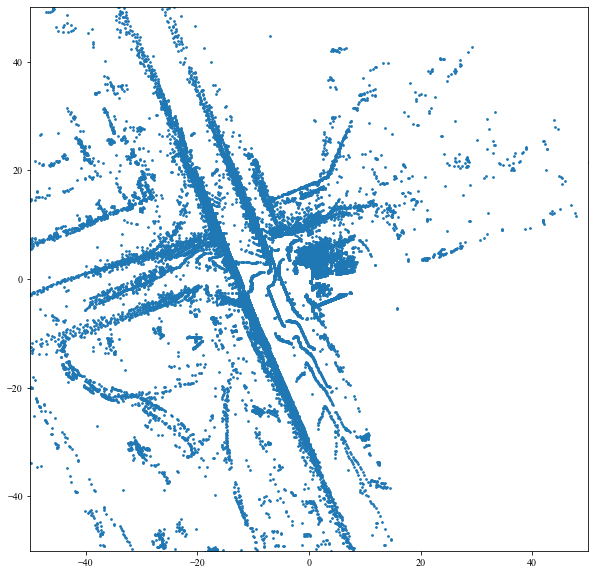

In [140]:
plt.figure(figsize=(10,10))
plt.scatter(points[:,0][index],points[:,1][index],s = 3)
plt.ylim(-50,50)
plt.xlim(-50,50)
plt.show()

In [58]:
Moving_map

array([[  6.48 ,   6.488,   6.148, ...,   2.884,   5.38 ,   5.38 ],
       [ 10.12 ,  10.128,  10.136, ...,  10.092,  10.1  ,  10.116],
       [ 13.548,  13.556,   4.256, ...,   3.204,  13.52 ,  13.528],
       ...,
       [ 17.384,   2.62 ,  17.416, ...,  17.296,   6.628,   6.624],
       [  6.04 ,   6.052,   4.28 , ...,   5.644,   4.428,   5.916],
       [  4.668,   4.672,   4.66 , ...,   3.968,   3.96 , 111.088]])

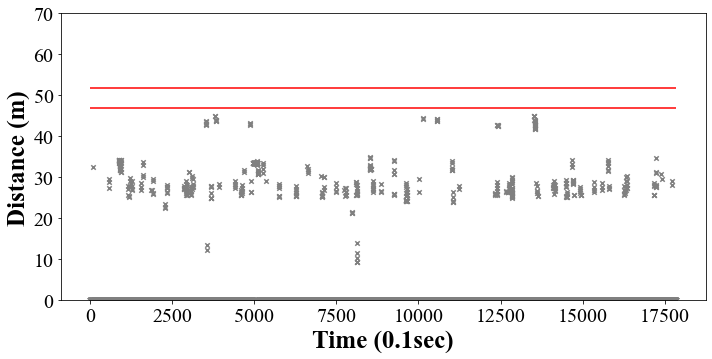

In [47]:
plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(foreground_points)),foreground_points,s = 20, marker = 'x', label = "Laser Traveling Distance", c = 'gray')
thred = thred_map[:,laser_id,azimuth_channel]
for i in range(len(thred)):
    plt.hlines(thred[i],0,aggregated_map.shape[0],color = 'r')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel('Distance (m)',fontsize = 25, fontweight = 'bold')
plt.xlabel('Time (0.1sec)',fontsize = 25, fontweight = 'bold')
plt.tight_layout()
plt.ylim(0,70)

# plt.xlim(1400,1500)
# plt.savefig(r'C:\Users\zhChe\OneDrive - nevada.unr.edu\ITSmanuscript\Figs\parameterdefinition.tif', dpi = 600)
plt.show()